In [1]:
from seir_models import *
from seir_utils import *
import numpy as np
np.random.seed(42)

In [2]:
# === LOAD DATA ===
filepath = "epi_data_comparison/simulation_outputs/normal/output_luxembourg.csv"
initial_conditions, observed = extract_initial_conditions_and_observed(filepath)


In [3]:
times = np.arange(len(observed))

Maximising LogPDF
Using Exponential Natural Evolution Strategy (xNES)
Running in sequential mode.
Population size: 7
Iter. Eval. Best      Current   Time    
0     7     -5.27e+09 -5.27e+09   0:00.1
1     14    -3.27e+09 -3.27e+09   0:00.1
2     21    -5.34e+08 -5.34e+08   0:00.1
3     28    -5.34e+08 -3.3e+09    0:00.1
20    147   -2.8e+08  -5.08e+08   0:00.2
40    287   -2.73e+08 -2.73e+08   0:00.3
60    427   -2.72e+08 -2.72e+08   0:00.4
80    567   -2.72e+08 -2.72e+08   0:00.5
100   707   -2.72e+08 -2.72e+08   0:00.6
120   847   -2.72e+08 -2.72e+08   0:00.7
140   987   -2.72e+08 -2.72e+08   0:00.8
160   1127  -2.72e+08 -2.72e+08   0:00.9
180   1267  -2.72e+08 -2.72e+08   0:01.1
200   1407  -2.72e+08 -2.72e+08   0:01.2
220   1547  -2.72e+08 -2.72e+08   0:01.3
240   1687  -2.72e+08 -2.72e+08   0:01.4
260   1827  -2.72e+08 -2.72e+08   0:01.5
280   1967  -2.72e+08 -2.72e+08   0:01.6
300   2107  -2.72e+08 -2.72e+08   0:01.7
320   2247  -2.72e+08 -2.72e+08   0:01.8
340   2387  -2.72e+08 

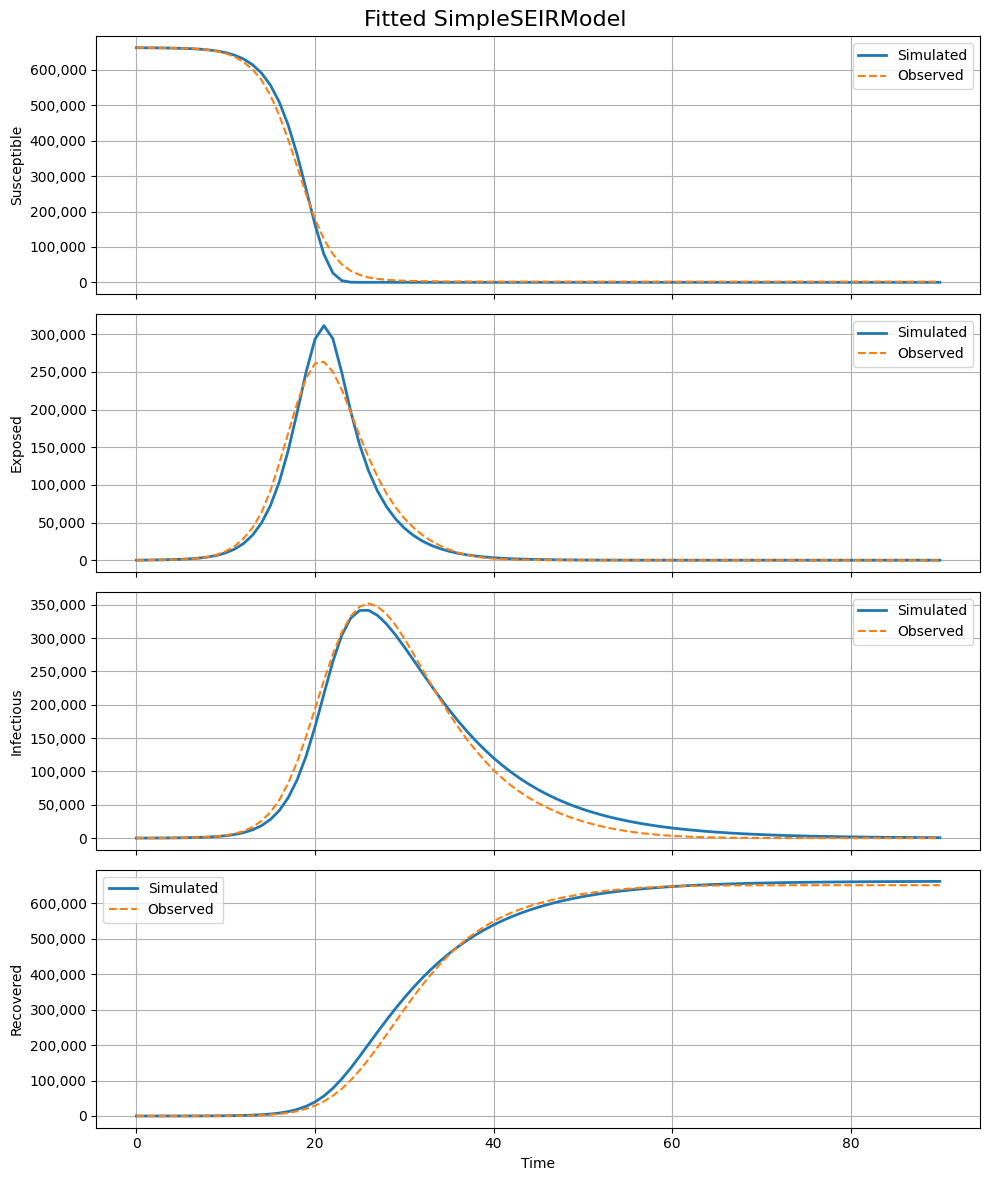

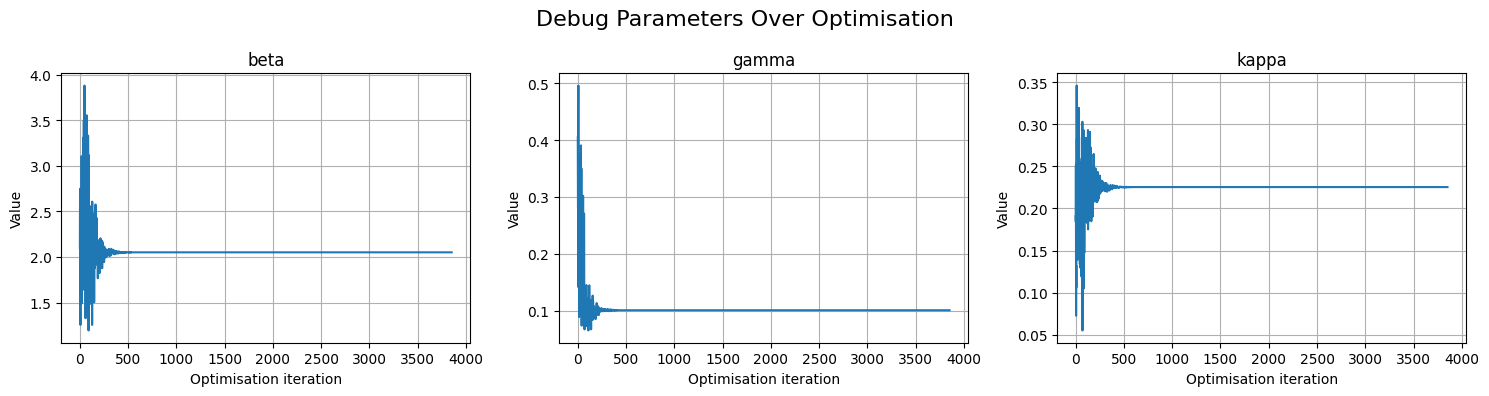

{'optimized_parameters': array([2.05118889, 0.22546231, 0.10045292]), 'log_posterior': -272318684.30034304, 'R_estimate': 4.2034464564896785, 'beta': 2.0511888944590275, 'kappa': 0.2254623050856784, 'gamma': 0.10045291948184083}


In [4]:

# Simple model
model = SimpleSEIRModel(initial_conditions)
result = model.fit_with_pints(times, observed, x0=[1.8, 1/5, 1/3])
print(result)


(91, 4)
[599000, 0, 100, 0]
Maximising LogPDF
Using Exponential Natural Evolution Strategy (xNES)
Running in sequential mode.
Population size: 10
Iter. Eval. Best      Current   Time    
0     10    -inf      -inf        0:00.0
1     20    -inf      -inf        0:00.0
2     30    -inf      -inf        0:00.0
3     40    -inf      -inf        0:00.0
20    210   -inf      -inf        0:00.0
40    410   -inf      -inf        0:00.0
60    610   -inf      -inf        0:00.0
80    810   -inf      -inf        0:00.0
100   1010  -inf      -inf        0:00.1
120   1210  -inf      -inf        0:00.1
140   1410  -inf      -inf        0:00.1
160   1610  -inf      -inf        0:00.1
180   1810  -inf      -inf        0:00.1
200   2000  -inf      -inf        0:00.1
Halting: No significant change for 200 iterations.


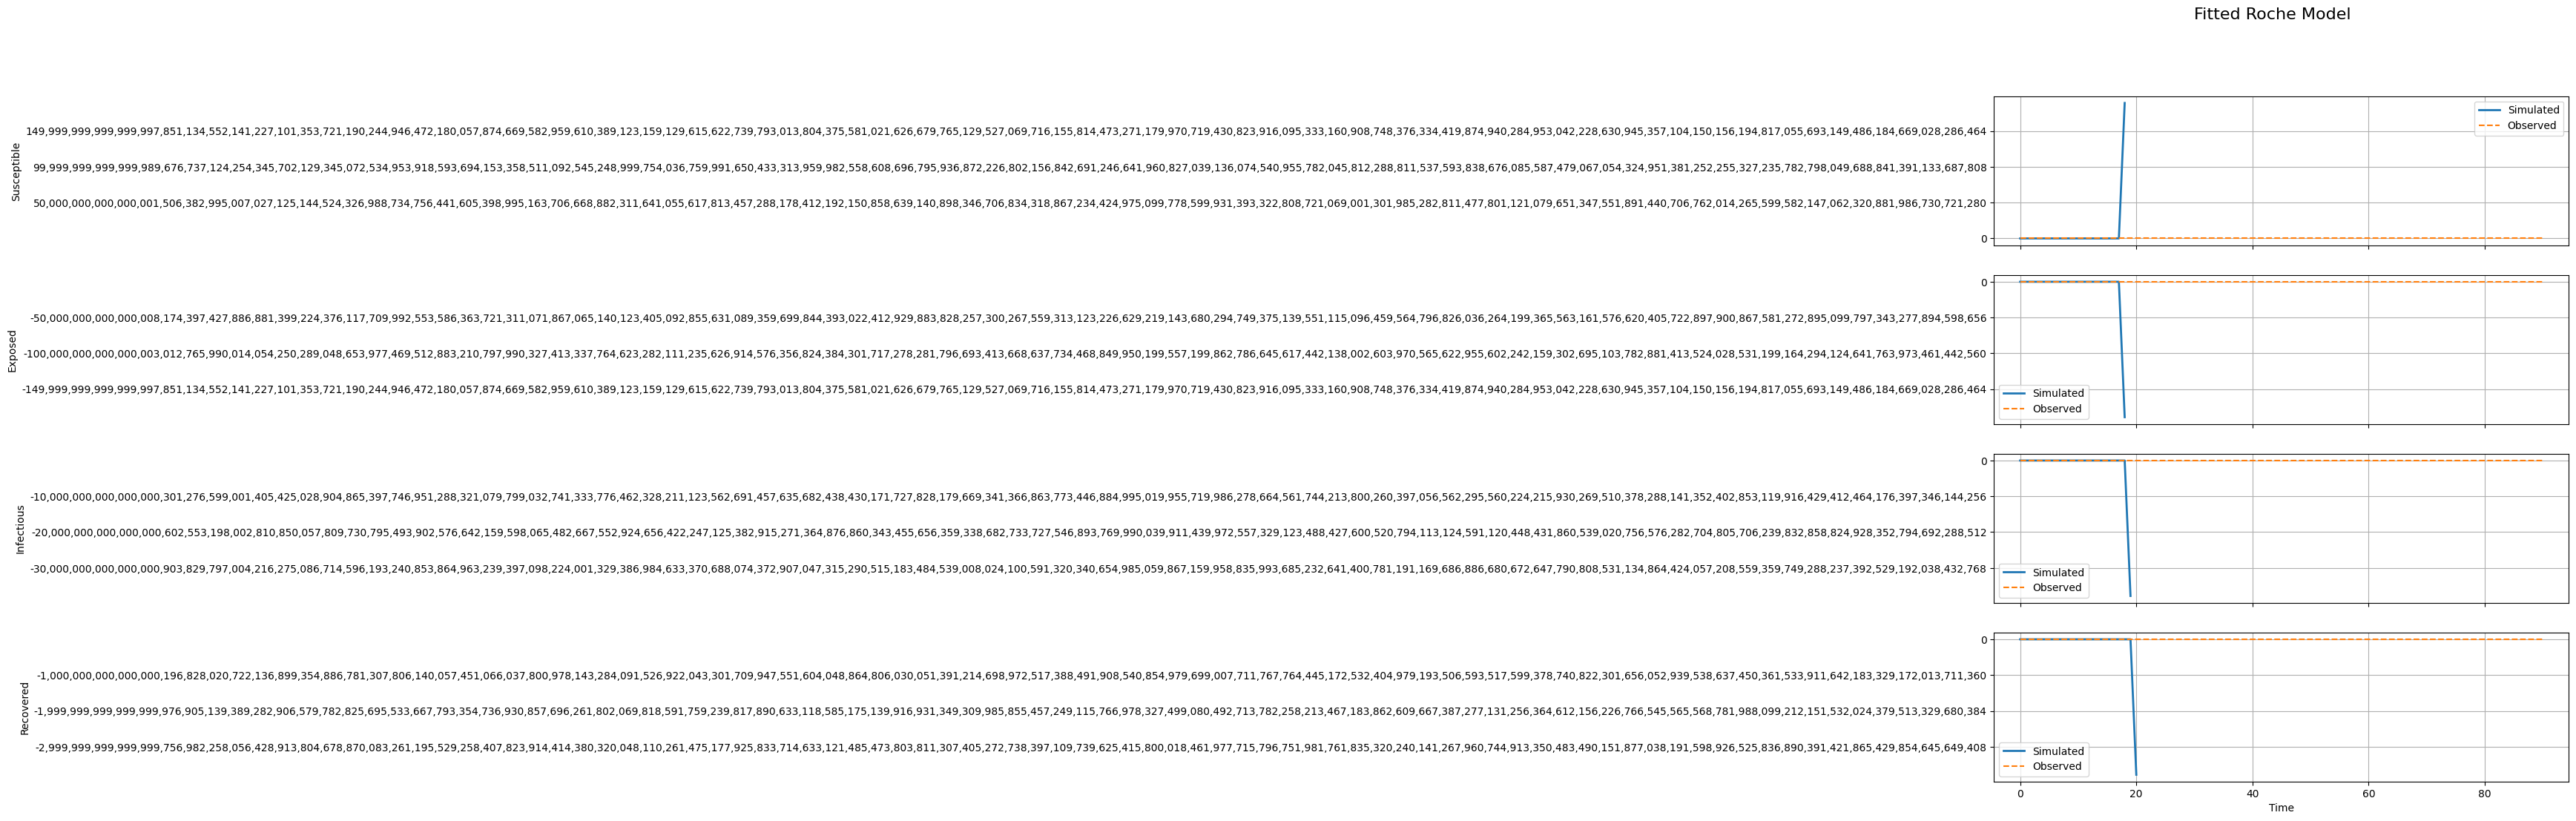

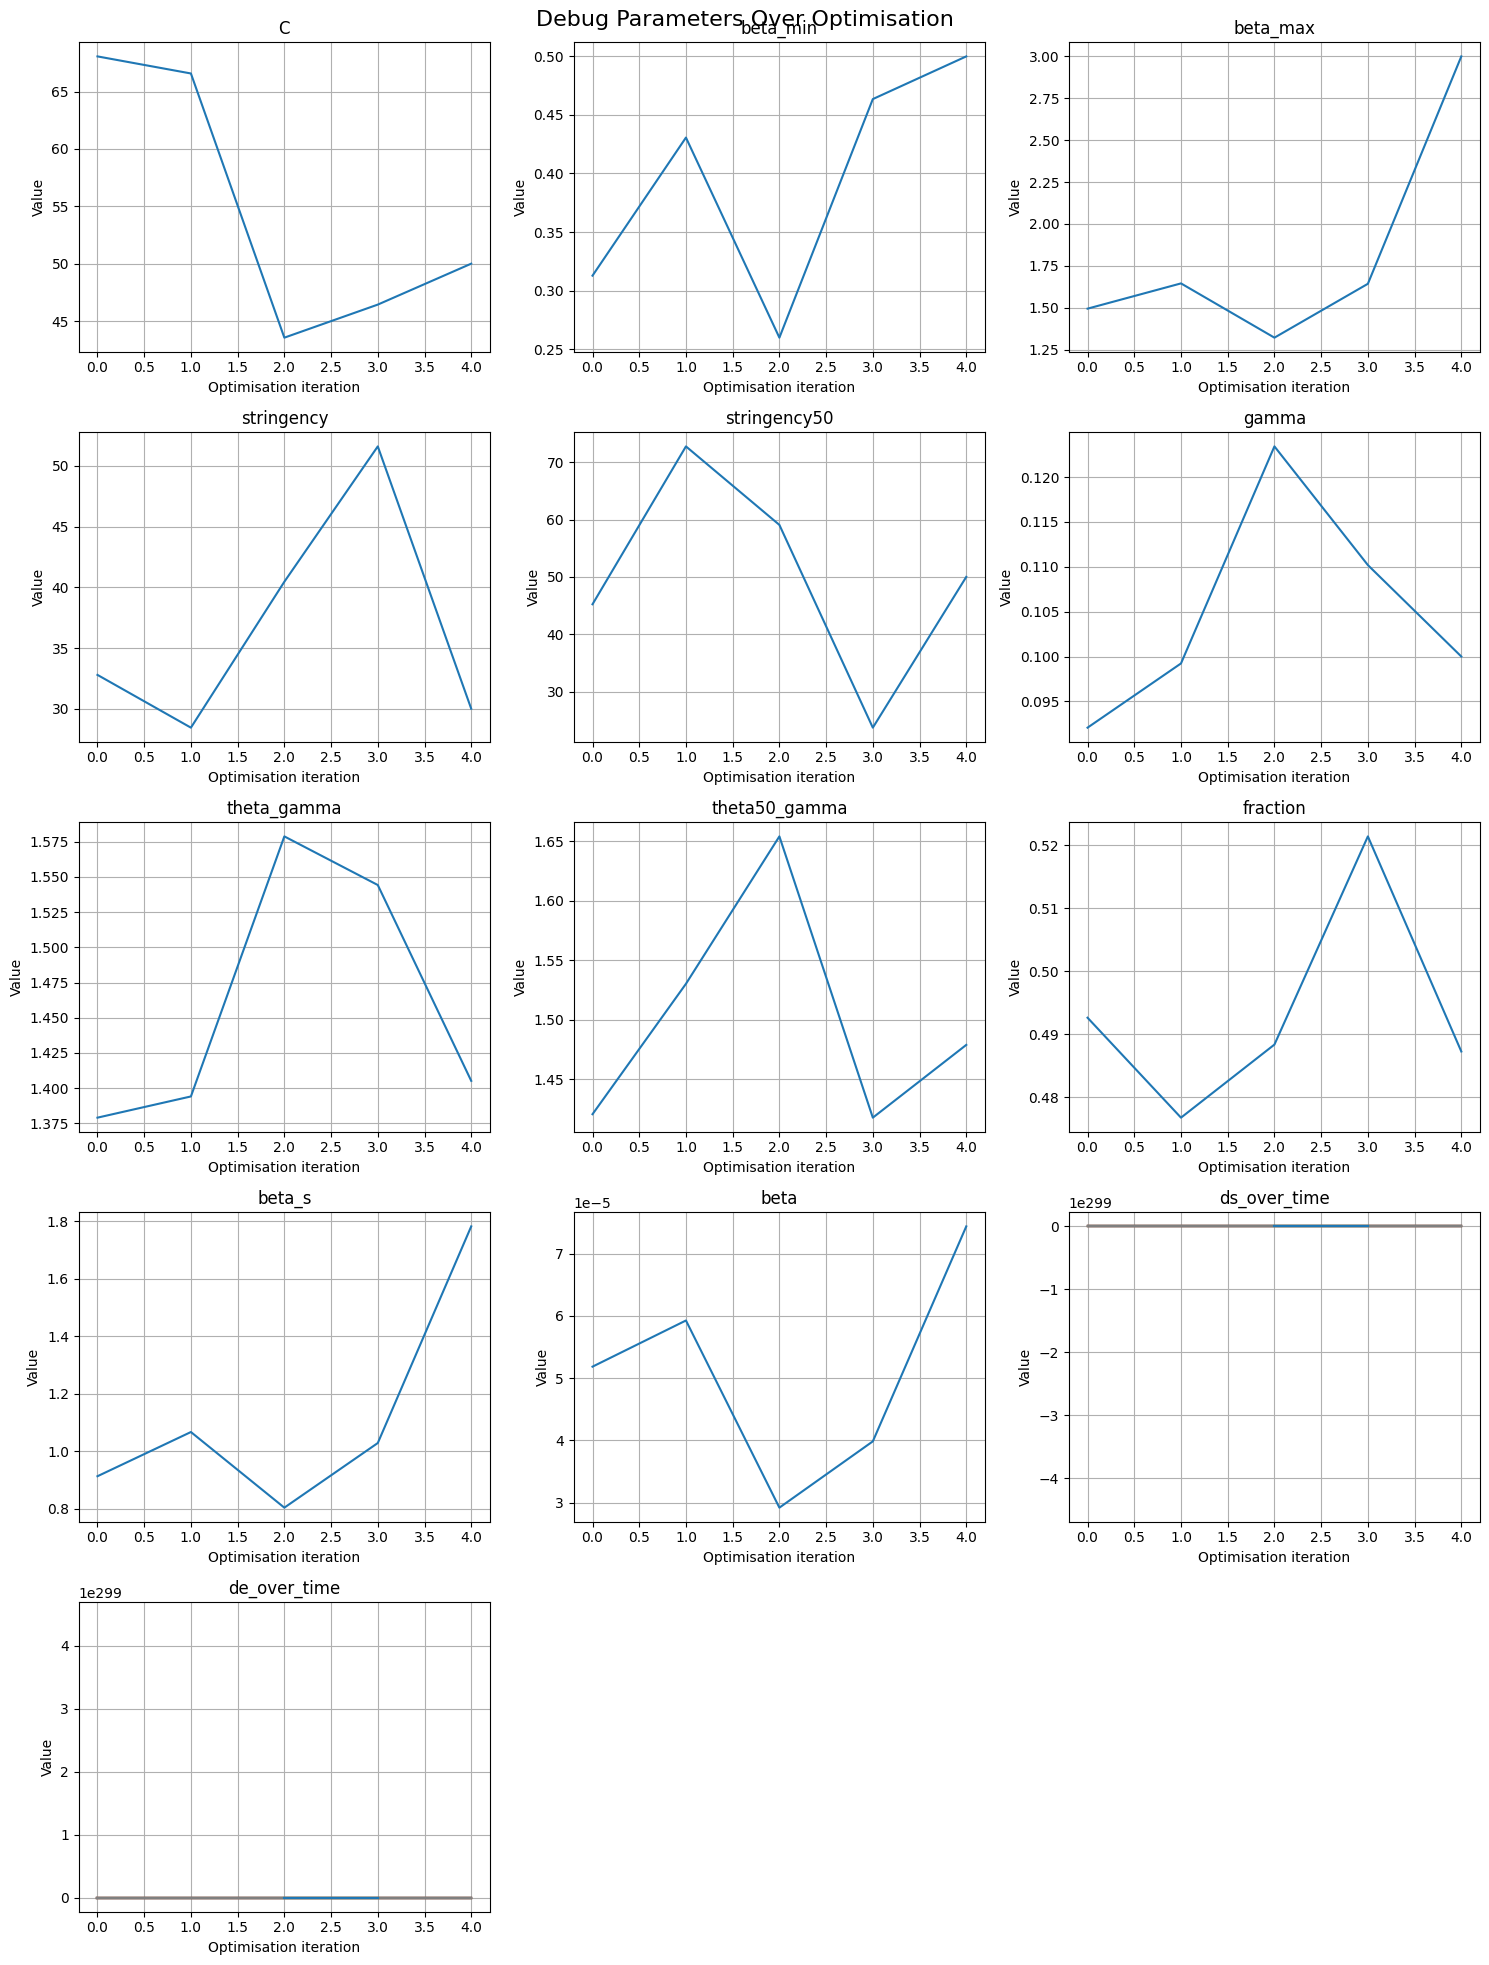

{'optimized_parameters': array([50. ,  0.5,  3. , 30. , 50. ,  5. ,  5. ,  5. ]), 'log_posterior': -inf, 'R_estimate': -2.881580149539941e+156, 'beta': 7.435818981731059e-05, 'kappa': 0.2, 'gamma': 0.1}


In [8]:
# Roche model
model = RocheModel(initial_conditions)
print(observed.shape)
print(initial_conditions)
times = np.arange(91)
result = model.fit_with_pints(times, observed, x0 = [50, 0.5, 3.0, 30, 50, 5, 5, 5])
print(result)

c:\Users\kemuk\OneDrive - Nexus365\Documents\My_Vaults\DPhil\Year 1\Hilary\First Rotation\first_rotation\seir_models.py:126: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


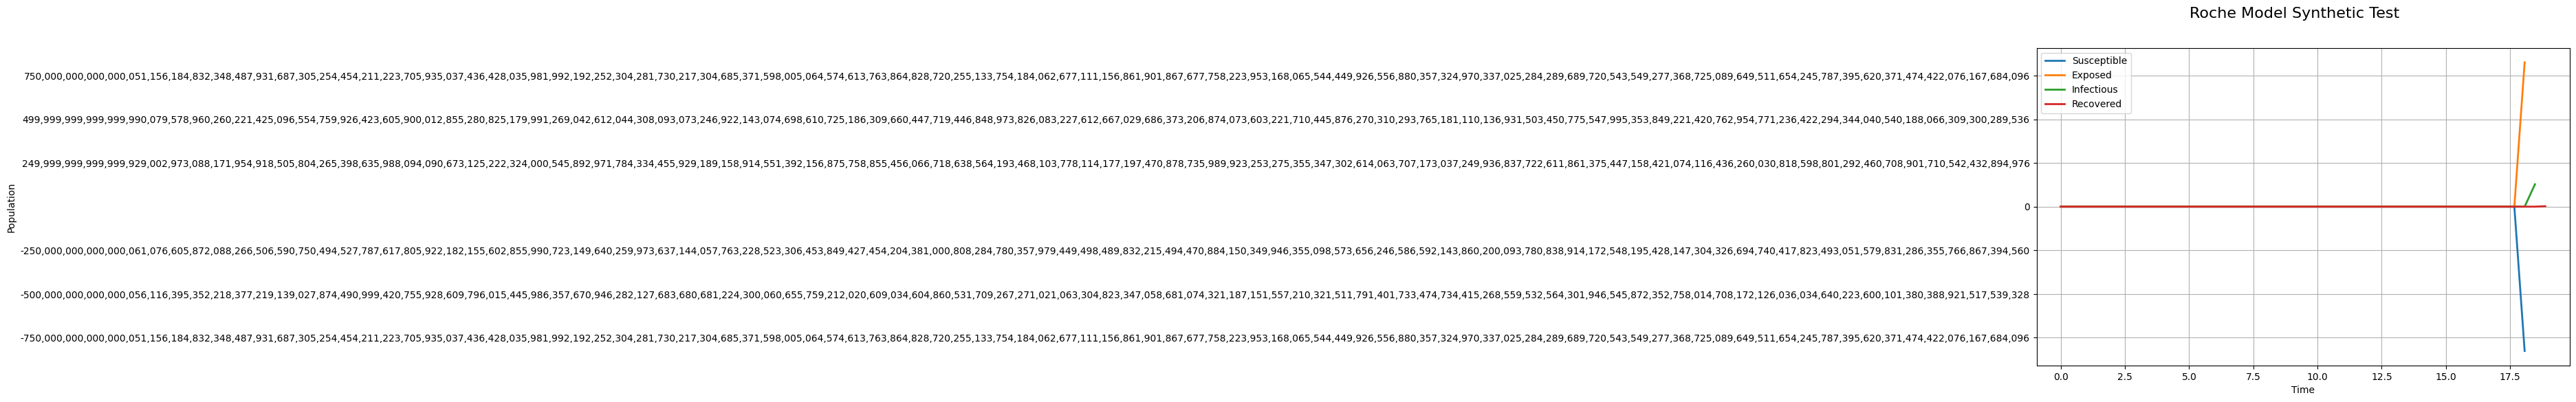

In [6]:
# Minimal test without loading data
initial_conditions = [599000, 0, 100, 0]

times = np.linspace(0, 100, 250)
parameters = [
    35,      # C: scaling factor (unitless)
    0.135,    # beta_min: minimum daily infection rate
    1.08,     # beta_max: maximum infection rate (symptomatic, no mitigation)
    50,     # stringency index (%)
    60,     # max stringency (%)
    2.59,     # k: time to become infectious after exposure (days)
    10,     # k_s: time from infectiousness to symptom onset (days)
    10,      # k_ri: time to recover for asymptomatic/mild cases (days)
]


model = RocheModel(initial_conditions)
states = model.simulate(parameters, times)

model.plot(times, states, title="Roche Model Synthetic Test")

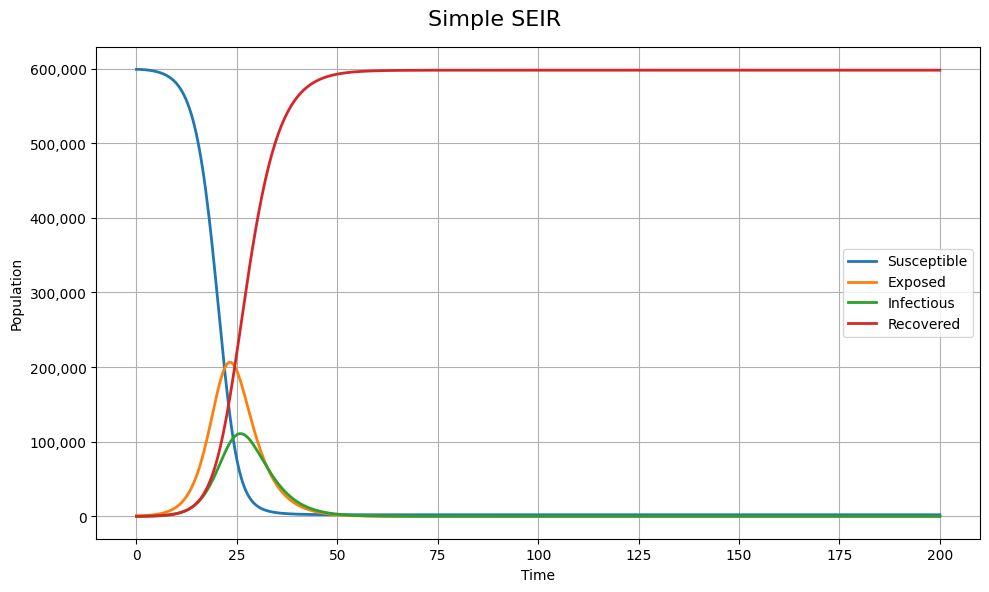

In [7]:
model = SimpleSEIRModel(initial_conditions=[599000, 1000, 0, 0])
params = [1.8, 1/5, 1/3]
times = np.linspace(0, 200, 500)
sim = model.simulate(params, times)
model.plot(times, sim, title="Simple SEIR")